<img src='https://drive.google.com/uc?id=1tqYIvII8lJ_FnqE6ugS21n4s93kMwTLy' />

## Machine Learning
## School of Computing and Engineering, University of West London
## Massoud Zolgharni

# Tutorial: Perceptron

## Prepare the dataset

In [ ]:
# Generate dataset
import numpy as np
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_features=2, centers=2, n_samples=1000, random_state=18)
f = open("data_Seminar_W5.txt", 'w')
for p in list(range(0,len(X))):
   f.write('%.2f\t %.2f\t %.2f\n' % (X[p,0], X[p,1], Y[p]))
f.close()

## Visualise dataset

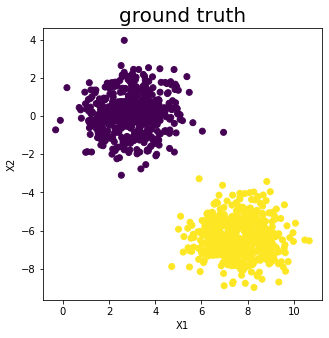

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set_title('ground truth', fontsize=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Add a bias to the X vector
X_bias = np.ones([X.shape[0], 3])
X_bias[:, 1:3] = X
# Initialize weight vector with zeros
w = np.zeros([3, 1])

## Auxiliary functions

In [ ]:
# Define the activation function  that returns either 1 or 0
def activation(x):
    return 1 if x >= 1 else 0

# A function to calculate the unit vector of our weights vector
def calc_unit_vector(x):
    return x.transpose() / np.sqrt(x.transpose().dot(x))

# A function that returns values that lay on the hyperplane
def calc_hyperplane(X, w):
    return np.ravel([-(w[0] + x * w[1]) / w[2] for x in X])

## Apply Perceptron learning rule

In [ ]:
for _ in range(10):
    for i in range(X_bias.shape[0]):
        y = activation(w.transpose().dot(X_bias[i, :]))
        # Update weights
        w = w + ((Y[i] - y) * X_bias[i, :]).reshape(w.shape[0], 1)

print('w0 = ', w[0])
print('w1 = ', w[1])
print('w2 = ', w[2])


# Calculate the class of the data points with the weight vector
result = [w.transpose().dot(x) for x in X_bias]
result_class = [activation(w.transpose().dot(x)) for x in X_bias]

# Calculate unit vector
w = calc_unit_vector(w).transpose()

w0 =  [-45.]
w1 =  [0.5714615]
w2 =  [-14.18982437]


## Visualise results

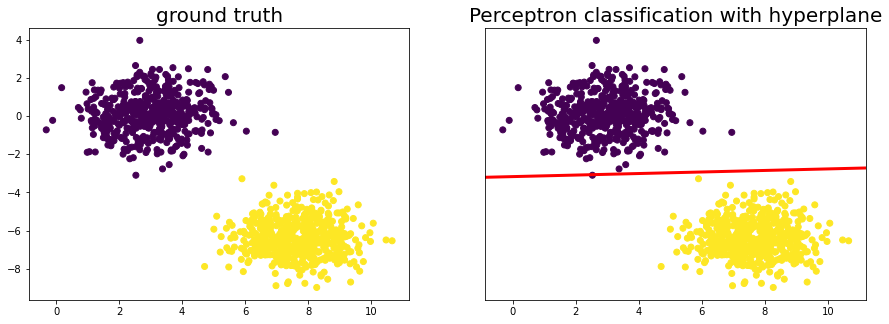

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=Y)
ax[0].set_title('ground truth', fontsize=20)

ax[1].scatter(X[:, 0], X[:, 1], c=result_class)
ax[1].plot([-20, 20], calc_hyperplane([-20, 20], w), lw=3, c='red')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_yticks([])
ax[1].set_title('Perceptron classification with hyperplane', fontsize=20)
plt.show()

## Visualise misclassifications

In [ ]:
# calculate misclassified points
# your code here
# misclassified = ....

# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# ax.scatter(X[:, 0], X[:, 1], c=misclassified)
# ax.set_title('misclassified points', fontsize=20)
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()